### Recovery 26으로 고정 (2주) -> 2.5주(system) (Disruption-frequency 민감도 분석)
lambda = 1 -> 0.046 (down 확률)\
lambda = 2 -> 0.088\
lambda = 4 -> 0.161\
lambda = 8 -> 0.278\
lambda = 10 -> 0.325


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("Data_Wholesale_1_26_0.1.csv")

# True 값 확인
true_values = df['disruption'].value_counts()
print(true_values)

# True 값 비율 확인
true_ratio = df['disruption'].sum() / len(df)
print(f"True 값 비율: {true_ratio:.2%}")

disruption
False    49660
True      2340
Name: count, dtype: int64
True 값 비율: 4.50%


dual_profits : [np.float64(137685.825), np.float64(131858.2), np.float64(122738.675), np.float64(110208.45), np.float64(105964.7)]
inventory_profits : [np.float64(136967.58038456898), np.float64(132131.34692301255), np.float64(124891.69634622146), np.float64(115690.6805767944), np.float64(112656.58288461596)]
wholesale_profits : [np.float64(134294.35), np.float64(124502.0), np.float64(108508.25), np.float64(86177.2), np.float64(78635.55)]


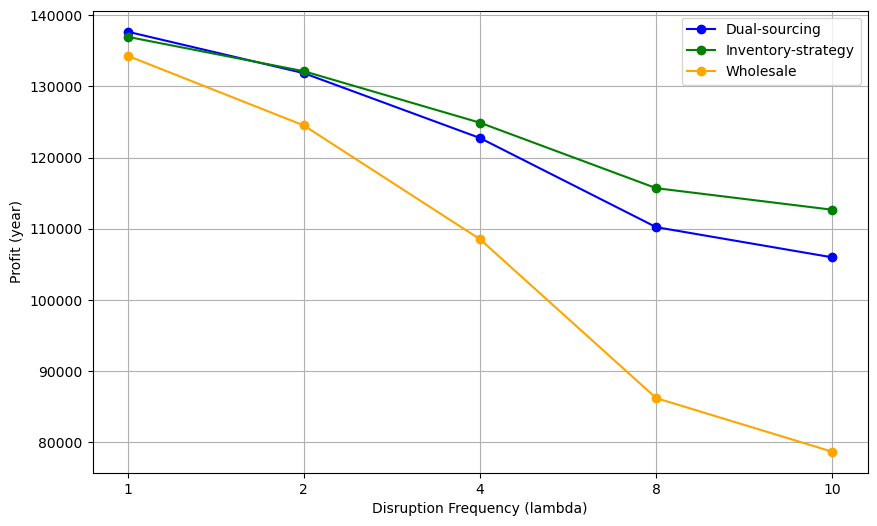

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# disruption-frequency 값 설정
disruption_frequencies = [1, 2, 4, 8, 10]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_26_0.1.csv")
    dual_profit = df_dual['profit'].iloc[-1] / 1000 
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_26_0.1.csv")
    inventory_profit = df_inventory['profit'].iloc[-1] / 1000
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_26_0.1.csv")
    wholesale_profit = df_wholesale['profit'].iloc[-1] / 1000
    wholesale_profits.append(wholesale_profit)

print(f"dual_profits : {dual_profits}")
print(f"inventory_profits : {inventory_profits}")
print(f"wholesale_profits : {wholesale_profits}")

# X축 인덱스 균등 배치
x_indices = list(range(len(disruption_frequencies)))

# Plot 생성
plt.figure(figsize=(10, 6))
plt.plot(x_indices, dual_profits, label='Dual-sourcing', marker='o', linestyle='-', color='b')
plt.plot(x_indices, inventory_profits, label='Inventory-strategy', marker='o', linestyle='-', color='g')
plt.plot(x_indices, wholesale_profits, label='Wholesale', linestyle='-', color='orange', marker='o')

# 그래프 레이블 및 제목 설정
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Profit (year)')
plt.legend()
plt.grid(True)

# X축 눈금 간격 균등 조정
plt.xticks(x_indices, disruption_frequencies)

plt.show()


dual_improvements : [np.float64(2.5254040843862797), np.float64(5.908499461856044), np.float64(13.114601885110122), np.float64(27.885856119716117), np.float64(34.75419196533882)]
inventory_improvements : [np.float64(1.9905754669269218), np.float64(6.127891056378651), np.float64(15.098802483886214), np.float64(34.247435025499094), np.float64(43.264188887361954)]


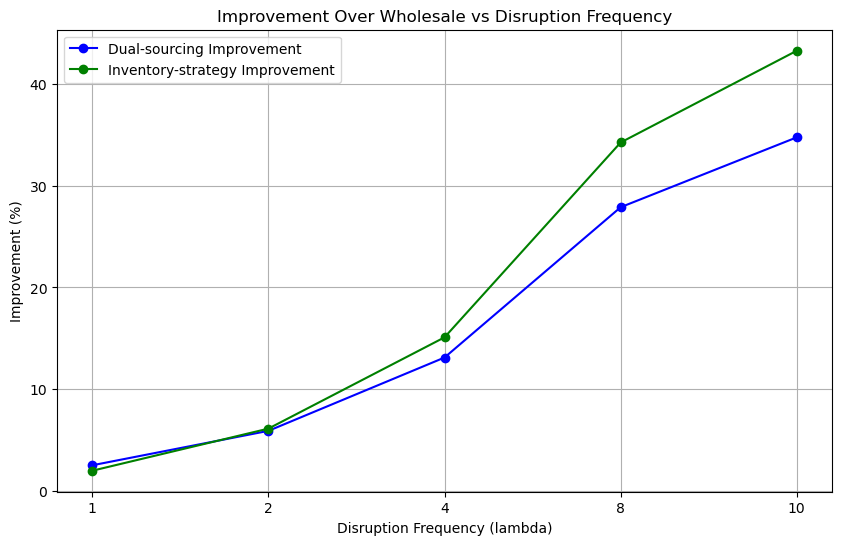

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# disruption-frequency 값 설정
disruption_frequencies = [1, 2, 4, 8, 10]

# 각 disruption-frequency에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_{freq}_26_0.1.csv")
    dual_profit = df_dual['profit'].iloc[-1] / 1000 
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_{freq}_26_0.1.csv")
    inventory_profit = df_inventory['profit'].iloc[-1] / 1000
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for freq in disruption_frequencies:
    df_wholesale = pd.read_csv(f"Data_Wholesale_{freq}_26_0.1.csv")
    wholesale_profit = df_wholesale['profit'].iloc[-1] / 1000
    wholesale_profits.append(wholesale_profit)

# 개선율(Improvement) 계산
dual_improvements = []
inventory_improvements = []

for i in range(len(disruption_frequencies)):
    if wholesale_profits[i] == 0:
        dual_improvement = 0
        inventory_improvement = 0
    else:
        dual_improvement = ((dual_profits[i] - wholesale_profits[i]) / wholesale_profits[i]) * 100
        inventory_improvement = ((inventory_profits[i] - wholesale_profits[i]) / wholesale_profits[i]) * 100
    dual_improvements.append(dual_improvement)
    inventory_improvements.append(inventory_improvement)

print(f"dual_improvements : {dual_improvements}")
print(f"inventory_improvements : {inventory_improvements}")

# X축 인덱스 균등 배치
x_indices = list(range(len(disruption_frequencies)))

# 개선율 플롯 생성
plt.figure(figsize=(10, 6))
plt.plot(x_indices, dual_improvements, label='Dual-sourcing Improvement', 
         marker='o', linestyle='-', color='b')
plt.plot(x_indices, inventory_improvements, label='Inventory-strategy Improvement', 
         marker='o', linestyle='-', color='g')

# 플롯 레이블 및 제목 설정
plt.title('Improvement Over Wholesale vs Disruption Frequency')
plt.xlabel('Disruption Frequency (lambda)')
plt.ylabel('Improvement (%)')
plt.legend()
plt.grid(True)

# X축 눈금 간격 균등 조정
plt.xticks(x_indices, disruption_frequencies)  # 눈금 위치를 균등하게 배치하고 라벨을 원래 disruption_frequencies로 설정

plt.show()


## Disruption-frquency = 2로 고정 (Recovery 민감도 분석 )
아래의 Down 확률 disruption-frequency 민감도 분석과 맞춰야함.\
0.046 -> mu = 69(시스템상 1.254주)\
0.088 -> mu = 25.9(시스템상 2.509주)\
0.161 -> mu = 11.6(시스템상 4.989주)\
0.278 -> mu = 5.5(시스템상 10.011주)\
0.325 -> mu = 4.3(시스템상 12.519주)

In [9]:
df = pd.read_csv("Data_Wholesale_2_69_0.1.csv")

# True 값 확인
true_values = df['disruption'].value_counts()
print(true_values)

# True 값 비율 확인
true_ratio = df['disruption'].sum() / len(df)
print(f"True 값 비율: {true_ratio:.2%}")

disruption
False    49618
True      2382
Name: count, dtype: int64
True 값 비율: 4.58%


dual_profits : [np.float64(138172.775), np.float64(131652.025), np.float64(120480.525), np.float64(102898.75), np.float64(95264.775)]
inventory_profits : [np.float64(138646.4528846748), np.float64(131906.04326916614), np.float64(119938.06500009217), np.float64(100933.079807618), np.float64(92829.2450000604)]
wholesale_profits : [np.float64(134098.9), np.float64(124284.7), np.float64(107105.9), np.float64(79247.4), np.float64(66396.9)]


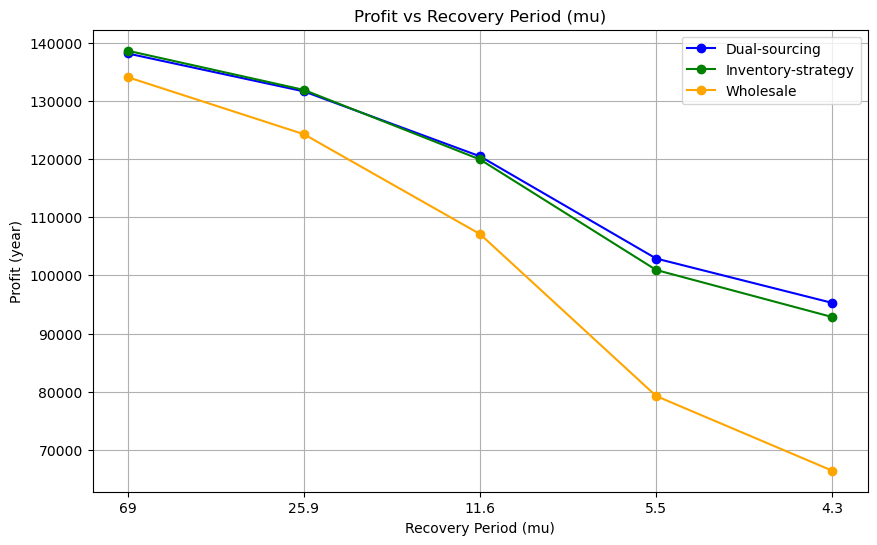

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정 (원래 순서대로)
recovery_values = [69, 25.9, 11.6, 5.5, 4.3]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_2_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1] / 1000
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_2_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1] / 1000
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_2_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1] / 1000 
    wholesale_profits.append(wholesale_profit)

print(f"dual_profits : {dual_profits}")
print(f"inventory_profits : {inventory_profits}")
print(f"wholesale_profits : {wholesale_profits}")

# 원래 recovery 순서를 유지하기 위해, x축은 인덱스(0,1,2,...)로 설정하고
# xtick 라벨을 recovery_values로 지정합니다.
x_indices = list(range(len(recovery_values)))

plt.figure(figsize=(10, 6))
plt.plot(x_indices, dual_profits, label='Dual-sourcing', marker='o', linestyle='-', color='b')
plt.plot(x_indices, inventory_profits, label='Inventory-strategy', marker='o', linestyle='-', color='g')
plt.plot(x_indices, wholesale_profits, label='Wholesale', marker='o', linestyle='-', color='orange')

# 그래프 레이블 및 제목 설정
plt.title('Profit vs Recovery Period (mu)')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Profit (year)')
plt.legend()
plt.grid(True)

# xtick 위치는 인덱스로, 라벨은 원래 recovery_values 순서대로 설정
plt.xticks(x_indices, recovery_values)

plt.show()


dual_improvements : [np.float64(3.0379630257966324), np.float64(5.92778113476558), np.float64(12.487290616109851), np.float64(29.844953903850485), np.float64(43.477745195935356)]
inventory_improvements : [np.float64(3.391193279493572), np.float64(6.132165318149494), np.float64(11.980819917569601), np.float64(27.364531590459766), np.float64(39.809607075120084)]


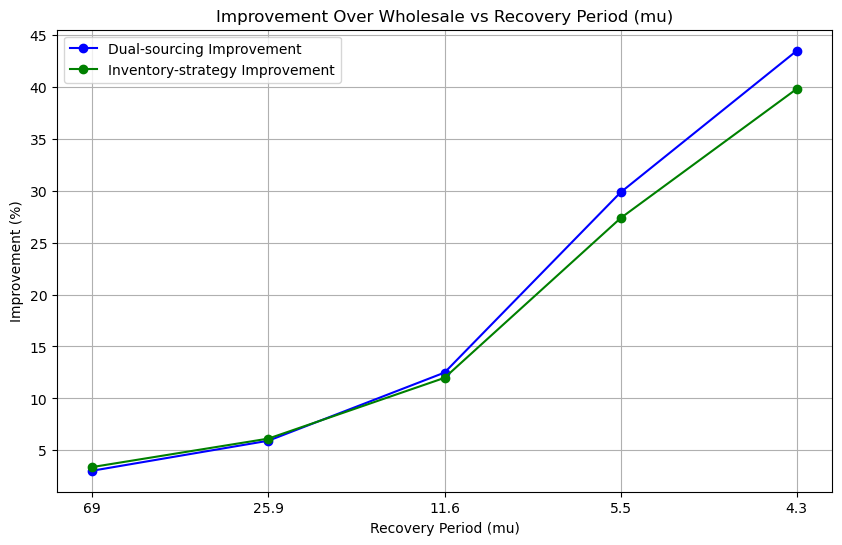

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# recovery 값 설정
recovery_values = [69, 25.9, 11.6, 5.5, 4.3]

# 각 recovery에 대한 profit을 저장할 리스트
dual_profits = []
inventory_profits = []
wholesale_profits = []

# Dual-sourcing 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_dual = pd.read_csv(f"Data_Dual-sourcing_2_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    dual_profit = df_dual['profit'].iloc[-1] / 1000
    dual_profits.append(dual_profit)

# Inventory-strategy 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_inventory = pd.read_csv(f"Data_inventory-strategy_2_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    inventory_profit = df_inventory['profit'].iloc[-1] / 1000
    inventory_profits.append(inventory_profit)

# Wholesale 데이터 읽기 및 profit 추출
for mu in recovery_values:
    df_wholesale = pd.read_csv(f"Data_wholesale_2_{mu}_0.1.csv")
    # 마지막 tick에서의 profit 가져오기
    wholesale_profit = df_wholesale['profit'].iloc[-1] / 1000 
    wholesale_profits.append(wholesale_profit)

# 개선율(Improvement)을 계산
# 개선율 = ((Profit(strategy) - Profit(Wholesale)) / Profit(Wholesale)) * 100
dual_improvements = []
inventory_improvements = []

for i in range(len(recovery_values)):
    # division-by-zero 방지를 위해 Wholesale profit이 0인 경우는 개선율 0으로 처리
    if wholesale_profits[i] == 0:
        dual_improvement = 0
        inventory_improvement = 0
    else:
        dual_improvement = ((dual_profits[i] - wholesale_profits[i]) / wholesale_profits[i]) * 100
        inventory_improvement = ((inventory_profits[i] - wholesale_profits[i]) / wholesale_profits[i]) * 100
    dual_improvements.append(dual_improvement)
    inventory_improvements.append(inventory_improvement)

print(f"dual_improvements : {dual_improvements}")
print(f"inventory_improvements : {inventory_improvements}")


x_indices = list(range(len(recovery_values)))

# 개선율 플롯 생성
plt.figure(figsize=(10, 6))
plt.plot(x_indices, dual_improvements, label='Dual-sourcing Improvement', 
         marker='o', linestyle='-', color='b')
plt.plot(x_indices, inventory_improvements, label='Inventory-strategy Improvement', 
         marker='o', linestyle='-', color='g')

# 플롯 레이블 및 제목 설정
plt.title('Improvement Over Wholesale vs Recovery Period (mu)')
plt.xlabel('Recovery Period (mu)')
plt.ylabel('Improvement (%)')
plt.legend()
plt.grid(True)
plt.xticks(x_indices, recovery_values)
plt.show()
